<a href="https://colab.research.google.com/github/Shreyasee438/Plant_Disease/blob/main/model_training_notebook/Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed (0)

import tensorflow as tf
tf.random.set_seed(0)

# **Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# **Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
import json
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
import os
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
# Download latest version
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 96% 1.95G/2.04G [00:12<00:02, 38.8MB/s]
100% 2.04G/2.04G [00:12<00:00, 181MB/s] 


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
from zipfile import ZipFile
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print (len(os.listdir ("plantvillage dataset/segmented")))
print (os.listdir("plantvillage dataset/segmented") [:5])


print (len(os.listdir ("plantvillage dataset/color")))
print (os.listdir ("plantvillage dataset/color")[:5])


print (len(os.listdir ("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']
38
['Tomato___Septoria_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Peach___Bacterial_spot', 'Grape___healthy', 'Potato___Late_blight']


# **Number of Classes = 38**

In [ ]:
print(len (os.listdir ("plantvillage dataset/color/Grape___healthy")))
print (os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['2fe405ca-8955-40a7-a2fb-526cd723548f___Mt.N.V_HL 8953.JPG', '8c3e4fd0-4183-4a75-9e29-76851d08379c___Mt.N.V_HL 8965.JPG', 'c60dbdbb-4ae6-4265-a587-de11c3c13e2d___Mt.N.V_HL 6136.JPG', 'cad08b01-b03c-4bee-a786-a6118ec09c37___Mt.N.V_HL 6081.JPG', '8fab615a-502c-4044-b863-459b04a70158___Mt.N.V_HL 8990.JPG']


# **Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


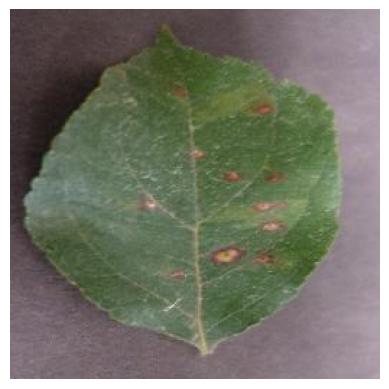

In [ ]:
import matplotlib
import matplotlib.image as mping
import matplotlib.pyplot as plt

image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/3e4303ad-6293-4522-821b-ef5dd3b658ce___FREC_C.Rust 3686.JPG'

# Read the image
img = matplotlib.image.imread(image_path)

print (img.shape)
# Display the image
plt.imshow(img)
plt.axis('off') # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/3e4303ad-6293-4522-821b-ef5dd3b658ce___FREC_C.Rust 3686.JPG'
# Read the image

img = mping.imread(image_path)

print(img)

[[[ 75  60  63]
  [ 75  60  63]
  [ 76  61  64]
  ...
  [167 154 164]
  [168 155 165]
  [168 155 165]]

 [[ 73  58  61]
  [ 74  59  62]
  [ 76  61  64]
  ...
  [163 150 160]
  [164 151 161]
  [164 151 161]]

 [[ 74  59  62]
  [ 77  62  65]
  [ 79  64  67]
  ...
  [162 149 159]
  [162 149 159]
  [163 150 160]]

 ...

 [[126 110 120]
  [129 113 123]
  [129 113 123]
  ...
  [178 162 173]
  [179 163 174]
  [179 163 174]]

 [[132 116 126]
  [132 116 126]
  [129 113 123]
  ...
  [178 162 173]
  [178 162 173]
  [178 162 173]]

 [[136 120 130]
  [135 119 129]
  [128 112 122]
  ...
  [176 160 171]
  [176 160 171]
  [176 160 171]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

# **Train Test Split**

In [ ]:
# Image Data Generators
import tensorflow as tf
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255,
validation_split = 0.2 # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
base_dir,
target_size=(img_size, img_size),
batch_size=batch_size,
subset='training',
class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
base_dir,
target_size=(img_size, img_size),
batch_size=batch_size,
subset='validation',
class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


# **Convolutional Neural Network**

In [ ]:
# Model Definition
import tensorflow as tf
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D (32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D (64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D (2, 2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense (256, activation='relu'))
model.add(tf.keras.layers.Dense (train_generator.num_classes, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile (optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

# **Model training**

In [ ]:
# Training the Model
history = model.fit(
train_generator,
steps_per_epoch=train_generator.samples // batch_size, # Number of steps per epoch
epochs=5, # Number of epochs
validation_data=validation_generator,
validation_steps=validation_generator.samples // batch_size # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 97s 66ms/step - accuracy: 0.5942 - loss: 1.6534 - val_accuracy: 0.8653 - val_loss: 0.4325
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 136s 66ms/step - accuracy: 0.9213 - loss: 0.2563 - val_accuracy: 0.8688 - val_loss: 0.4325
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 87s 64ms/step - accuracy: 0.9672 - loss: 0.1006 - val_accuracy: 0.8719 - val_loss: 0.4792
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 93s 69ms/step - accuracy: 0.9772 - loss: 0.0735 - val_accuracy: 0.8586 - val_loss: 0.5902
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 135s 64ms/step - accuracy: 0.9796 - loss: 0.0651 - val_accuracy: 0.8534 - val_loss: 0.7077


# **Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print (f"Validation Accuracy: {val_accuracy * 100: .2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.8548 - loss: 0.7233
Validation Accuracy:  85.34%


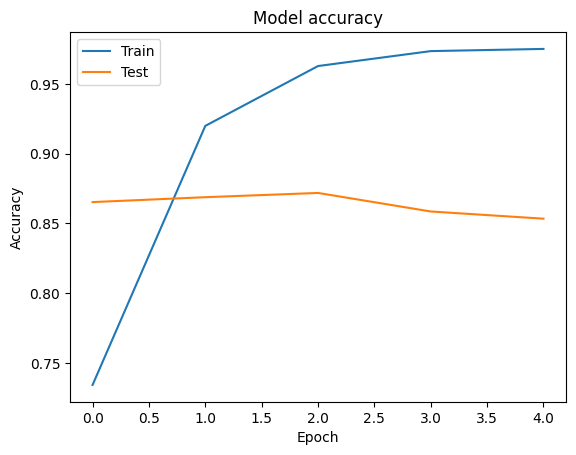

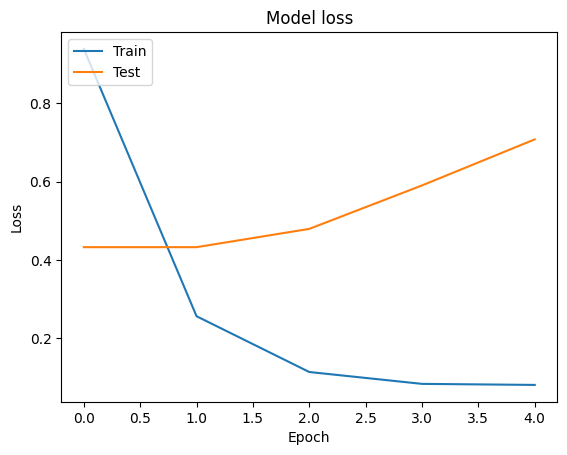

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt. legend (['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot (history. history['loss'])
plt.plot(history. history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt. legend (['Train', 'Test'], loc='upper left')
plt.show()

# **Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
from PIL import Image # Import Image from PIL
import numpy as np # Import numpy

def load_and_preprocess_image (image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open (image_path)
    #Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims (img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array
# Function to Predict the Class of an Image
def predict_image_class (model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image (image_path)
    predictions = model. predict (preprocessed_img)
    predicted_class_index = np.argmax (predictions, axis=1)[0]
    predicted_class_name = class_indices [predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

## **Fine tuning**

In [ ]:
# Example Usage
#image_path = '/content/test_apple_black_rot.jpg'
#image_path = '/content/test_blueberry_healthy.jpg"
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class (model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class Name: Potato___Early_blight


# **Save the model to Google drive or local**

In [ ]:
model.save("drive/MyDrive/trained_models/plant_disease_prediction.keras")
model.save('drive/MyDrive/trained_models/plant_disease_prediction.h5')

In [ ]:
from google.colab import drive
import os

# Remove the mount point if it exists and is not empty
if os.path.exists('/content/drive') and os.path.isdir('/content/drive') and os.listdir('/content/drive'):
    !rm -rf /content/drive/*

drive.mount('/content/drive')

rm: cannot remove '/content/drive/MyDrive': Operation canceled
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
